Stop runing spark context

In [1]:
sc.stop()

Import modules

In [2]:
import numpy as np
import pandas as pd
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
import datasets
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from deepchecks.suites import full_suite
from deepchecks import Dataset

seed=0

22/10/30 14:52:38 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/10/30 14:52:38 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/10/30 14:52:38 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
/home/haftamu/.local/lib/python3.8/site-packages/deepchecks/suites.py:21: DeprecationWarning:

Ability to import tabular suites from the `deepchecks.suites` is deprecated, please import from `deepchecks.tabular.suites` instead

/home/haftamu/.local/lib/python3.8/site-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



Create an array to save the various models

In [19]:
models = ["LinearSVC", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "Gradient Boosting", "MLP Classifier", "One vs Rest", "Keras Network"]

Train Test Split using
* Read the logic from the datasets.py file

In [20]:
x_train, x_test, y_train, y_test = datasets.get_sklearn_diabetes()
train, test = datasets.get_pyspark_diabetes()

Load the Scikit-learn ML Classifiers 

In [21]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay



sklearn_classifiers = [
    LinearSVC(random_state=seed),
    LogisticRegression(random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GaussianNB(),
    GradientBoostingClassifier(random_state=seed),
    MLPClassifier(random_state=seed),
    OneVsRestClassifier(LinearSVC())
]

sklearn_accuracy = []
sklearn_confusion = []
sklearn_roc = []
sklearn_precision = []
sklearn_recall = []
for clf in sklearn_classifiers:
    clf.fit(x_train, y_train)
    sklearn_accuracy.append(clf.score(x_test, y_test))
    sklearn_confusion.append(confusion_matrix(clf.predict(x_test), y_test))
    try:
        sklearn_roc.append(roc_auc_score(y_test, clf.predict(x_test)))
    except:
        pass
    sklearn_precision.append(precision_score(y_test, clf.predict(x_test), average="macro"))
    sklearn_recall.append(recall_score(y_test, clf.predict(x_test), average="macro"))

Load the PySpark ML Classifiers

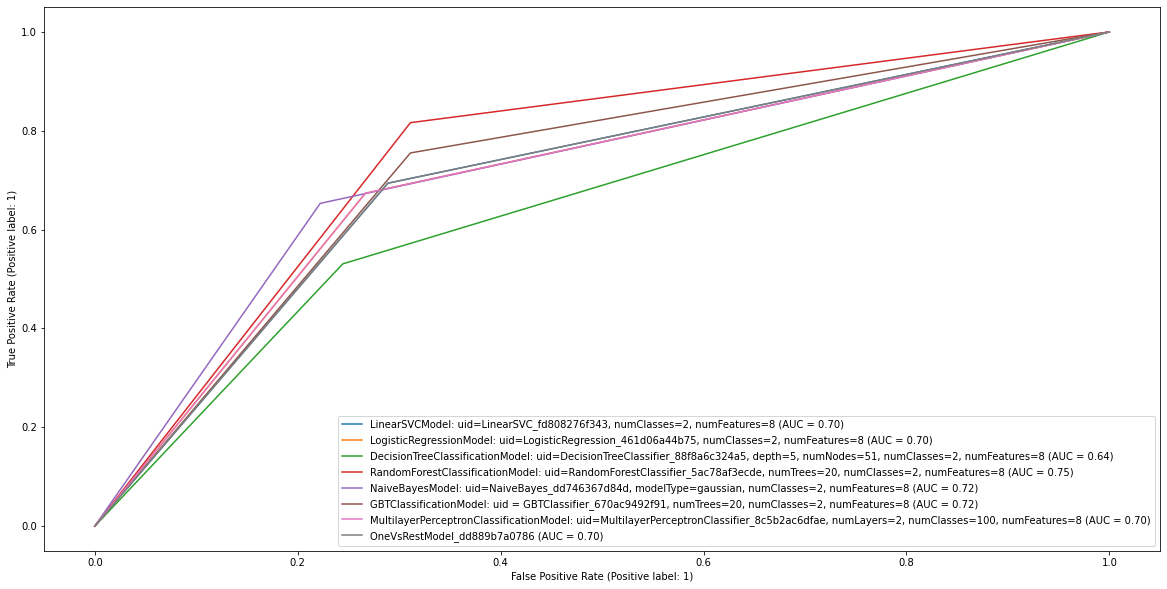

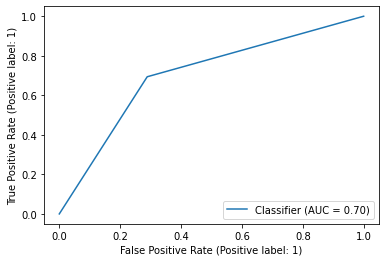

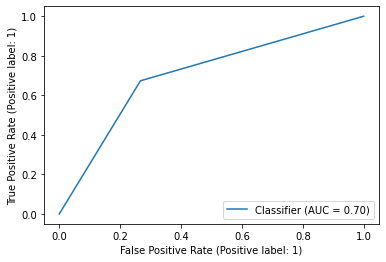

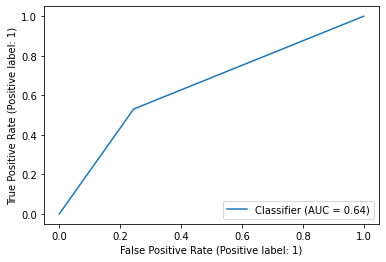

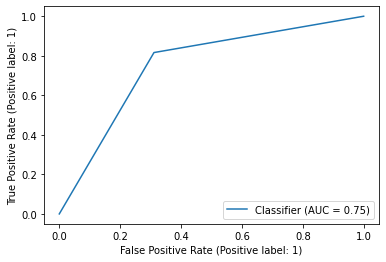

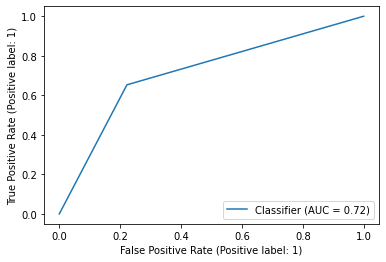

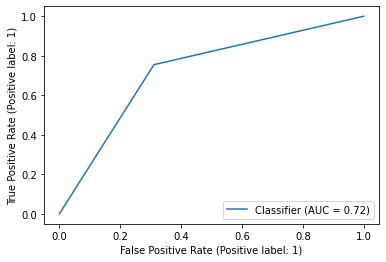

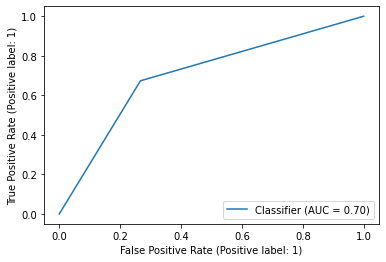

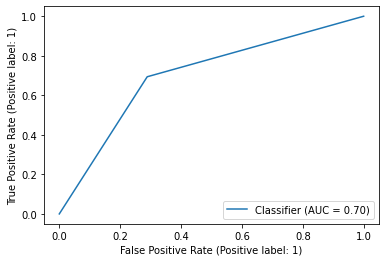

In [22]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import OneVsRest


pyspark_classifiers = [
    LinearSVC(labelCol="label"),
    LogisticRegression(labelCol="label"),
    DecisionTreeClassifier(labelCol="label", seed=seed),
    RandomForestClassifier(labelCol = 'label', seed=seed),
    NaiveBayes(labelCol = 'label', modelType="gaussian"),
    GBTClassifier(labelCol = 'label', seed=seed),
    MultilayerPerceptronClassifier(labelCol = 'label', seed=seed, layers=[len(test.toPandas()["features"][0]),100,]),
    OneVsRest(labelCol = 'label', classifier=LinearSVC())
]

pyspark_accuracy = []
pyspark_confusion = []
pyspark_roc = []
pyspark_precision = []
pyspark_recall = []
_, ax = plt.subplots(figsize=(20, 10))
for clf in pyspark_classifiers:
    clf = clf.fit(train)
    evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
    pyspark_accuracy.append(evaluator.evaluate(clf.transform(test)))
    pyspark_confusion.append(confusion_matrix(clf.transform(test).select("prediction").collect(), \
                      clf.transform(test).select("label").collect()))
    try:
        pyspark_roc.append(roc_auc_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    except:
        pass
    pyspark_precision.append(precision_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    pyspark_recall.append(recall_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    RocCurveDisplay.from_predictions(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()).plot(ax=ax, name=clf)

In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import OneVsRest


pyspark_classifiers = [
    LinearSVC(labelCol="label"),
    LogisticRegression(labelCol="label"),
    DecisionTreeClassifier(labelCol="label", seed=seed),
    RandomForestClassifier(labelCol = 'label', seed=seed),
    NaiveBayes(labelCol = 'label', modelType="gaussian"),
    GBTClassifier(labelCol = 'label', seed=seed),
    MultilayerPerceptronClassifier(labelCol = 'label', seed=seed, layers=[len(test.toPandas()["features"][0]),100,]),
    OneVsRest(labelCol = 'label', classifier=LinearSVC())
]

pyspark_accuracy = []
pyspark_confusion = []
pyspark_roc = []
pyspark_precision = []
pyspark_recall = []
_, ax = plt.subplots(figsize=(20, 10))
for clf in pyspark_classifiers:
    clf = clf.fit(train)
    evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
    pyspark_accuracy.append(evaluator.evaluate(clf.transform(test)))
    pyspark_confusion.append(confusion_matrix(clf.transform(test).select("prediction").collect(), \
                      clf.transform(test).select("label").collect()))
    pyspark_roc.append(roc_auc_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    pyspark_precision.append(precision_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    pyspark_recall.append(recall_score(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()))
    PrecisionRecallDisplay.from_predictions(clf.transform(test).select("label").collect(), \
                      clf.transform(test).select("prediction").collect()).plot(ax=ax, name=clf)

Keras Network Classifier

In [23]:
import tensorflow.keras as keras

clf = keras.Sequential()
clf.add(keras.layers.Dense(1024, activation='relu'))
clf.add(keras.layers.Dense(512, activation='relu'))
clf.add(keras.layers.Dense(128, activation='relu'))
clf.add(keras.layers.Dense(32, activation='relu'))
clf.add(keras.layers.Dense(1, activation='sigmoid'))

clf.compile(optimizer=keras.optimizers.Adam(),
            loss=keras.losses.BinaryCrossentropy(),
            metrics=keras.metrics.BinaryAccuracy())

clf.fit(x_train, y_train)
sklearn_accuracy.append(clf.evaluate(x_test, y_test)[1])
sklearn_confusion.append(confusion_matrix(np.round(clf.predict(x_test)), y_test))
sklearn_roc.append(roc_auc_score(y_test, np.round(clf.predict(x_test))))
sklearn_precision.append(precision_score(y_test, np.round(clf.predict(x_test))))
sklearn_recall.append(recall_score(y_test, np.round(clf.predict(x_test))))
pyspark_accuracy.append(clf.evaluate(x_test, y_test)[1])
pyspark_confusion.append(confusion_matrix(np.round(clf.predict(x_test)), y_test))
pyspark_roc.append(roc_auc_score(y_test, np.round(clf.predict(x_test))))
pyspark_precision.append(precision_score(y_test, np.round(clf.predict(x_test))))
pyspark_recall.append(recall_score(y_test, np.round(clf.predict(x_test))))

3/3 [==============================] - 0s 3ms/step


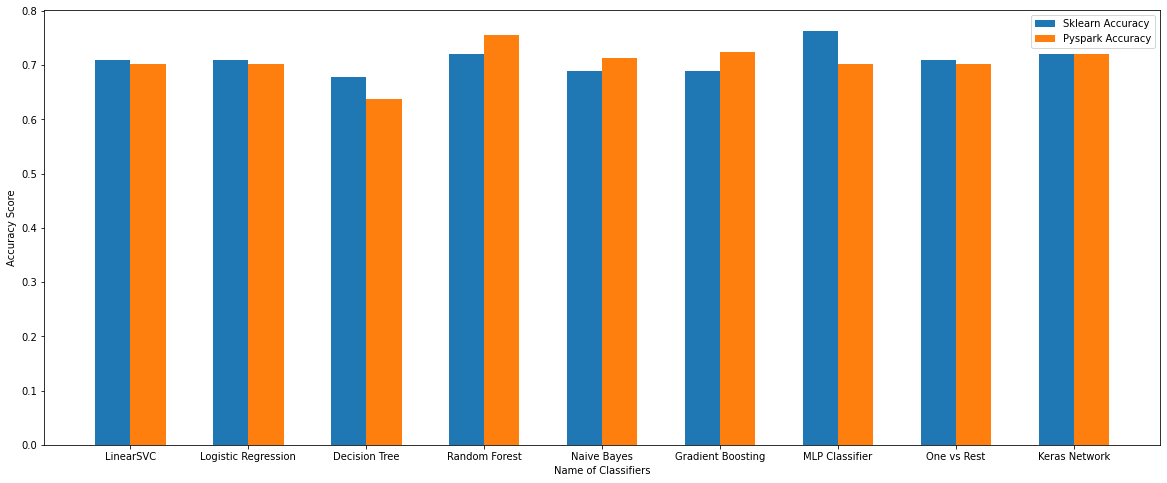

In [36]:
plt.figure(figsize=(20,8)) # width and height
plt.bar(models, sklearn_accuracy, align="edge", width=-0.3)
plt.bar(models, pyspark_accuracy, align="edge", width=0.3)
plt.xlabel('Name of Classifiers')
plt.ylabel('Accuracy Score')
plt.legend(["Sklearn Accuracy", "Pyspark Accuracy"])

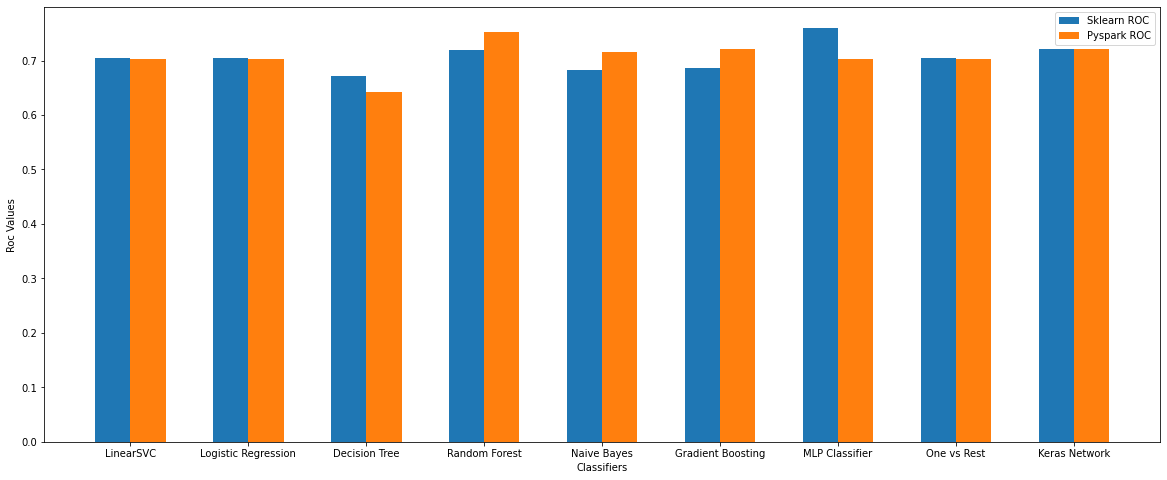

In [38]:
plt.figure(figsize=(20,8))
plt.bar(models, sklearn_roc, align="edge", width=-0.3)
plt.bar(models, pyspark_roc, align="edge", width=0.3)
plt.xlabel("Classifiers")
plt.ylabel("Roc Values")
plt.legend(["Sklearn ROC", "Pyspark ROC"])

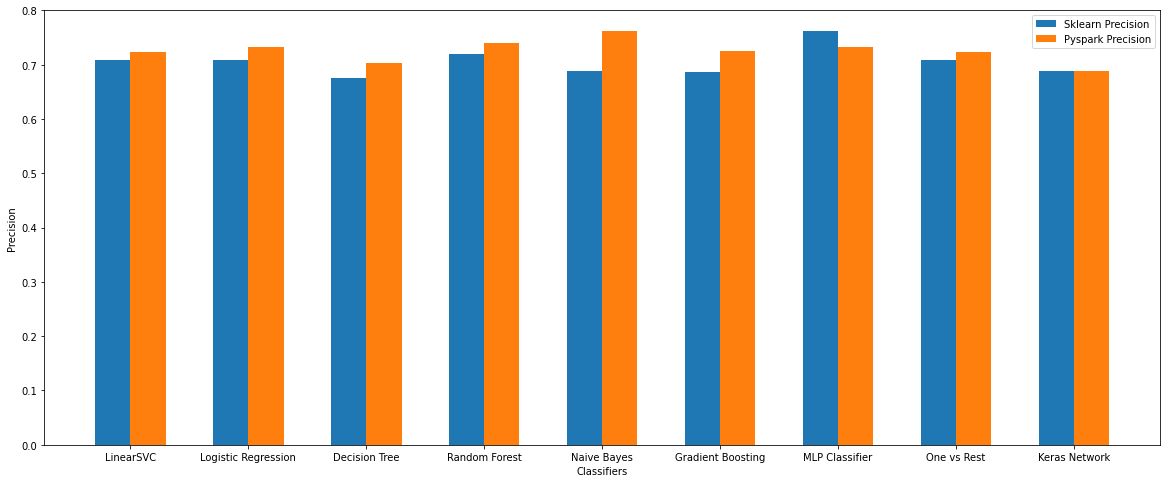

In [39]:
plt.figure(figsize=(20,8))
plt.bar(models, sklearn_precision, align="edge", width=-0.3)
plt.bar(models, pyspark_precision, align="edge", width=0.3)
plt.xlabel("Classifiers")
plt.ylabel("Precision")
plt.legend(["Sklearn Precision", "Pyspark Precision"])

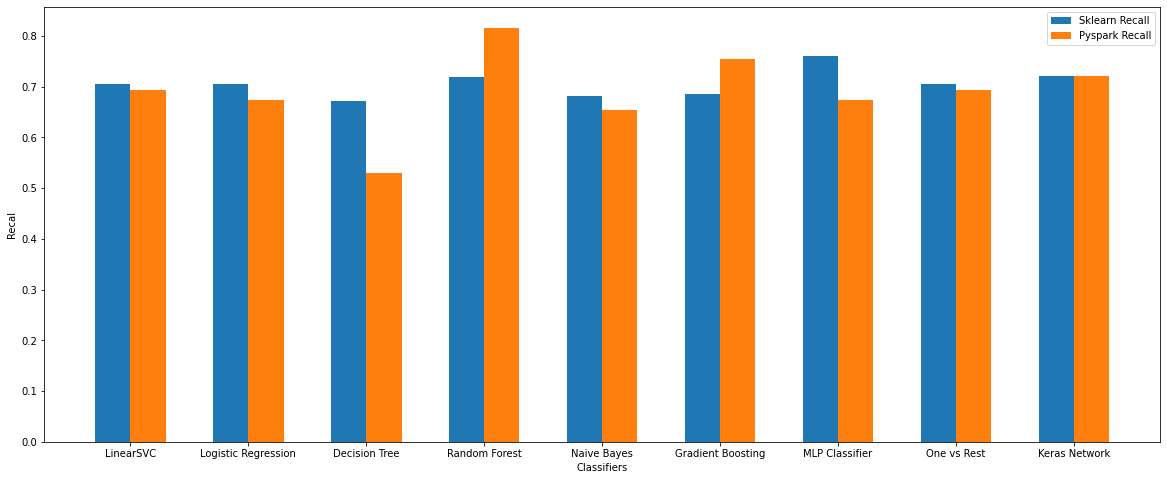

In [40]:
plt.figure(figsize=(20,8))
plt.bar(models, sklearn_recall, align="edge", width=-0.3)
plt.bar(models, pyspark_recall, align="edge", width=0.3)
plt.xlabel("Classifiers")
plt.ylabel("Recal")
plt.legend(["Sklearn Recall", "Pyspark Recall"])

PrecisionRecallDisplay
* Precision Recall visualization method

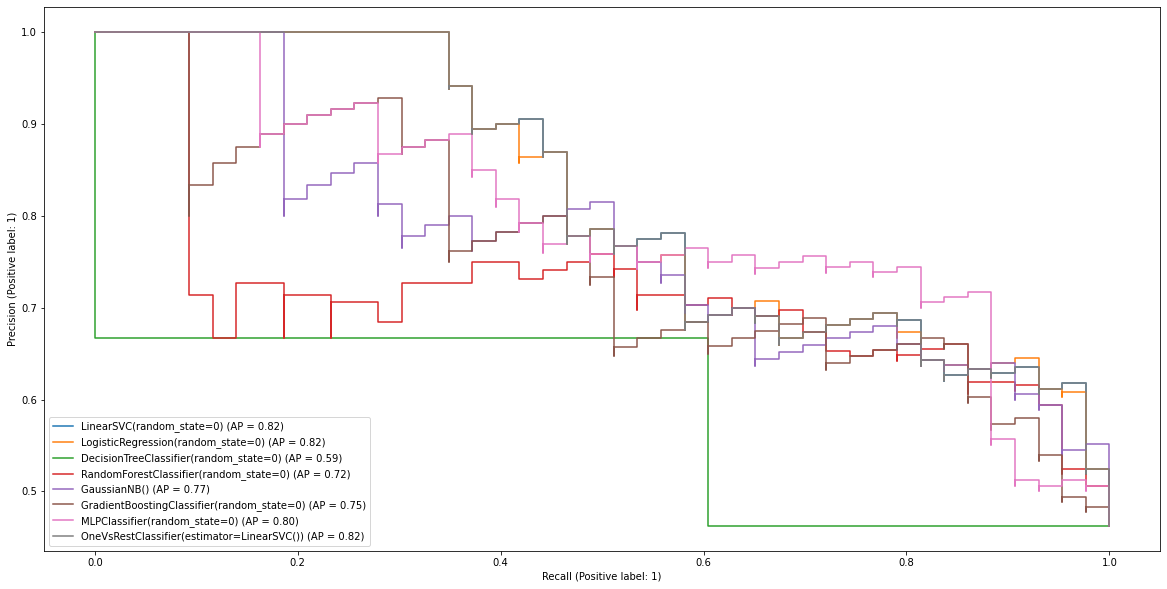

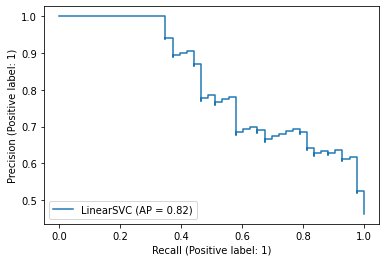

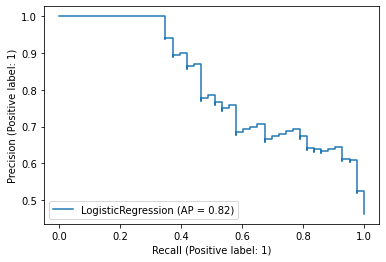

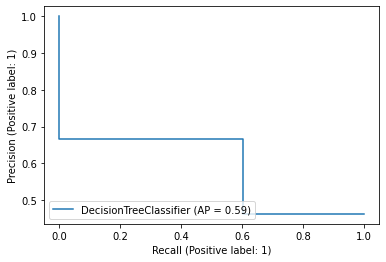

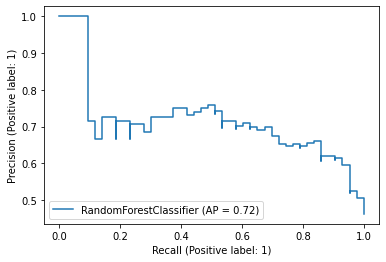

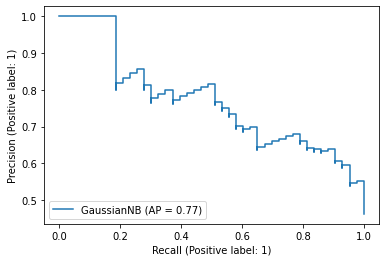

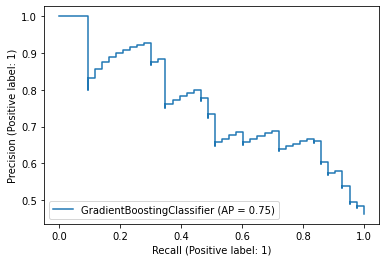

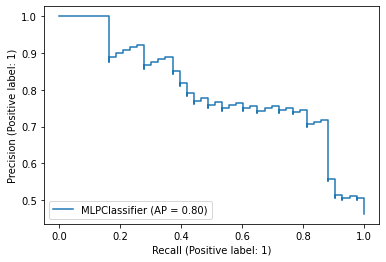

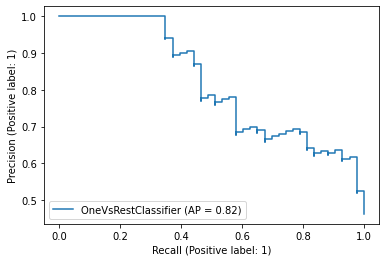

In [41]:
_, ax = plt.subplots(figsize=(20, 10))
for clf in sklearn_classifiers:
    PrecisionRecallDisplay.from_estimator(clf, x_test, y_test).plot(ax=ax, name=clf)

RocCurveDisplay
* Roc Curve visualization method from Scikit-learn

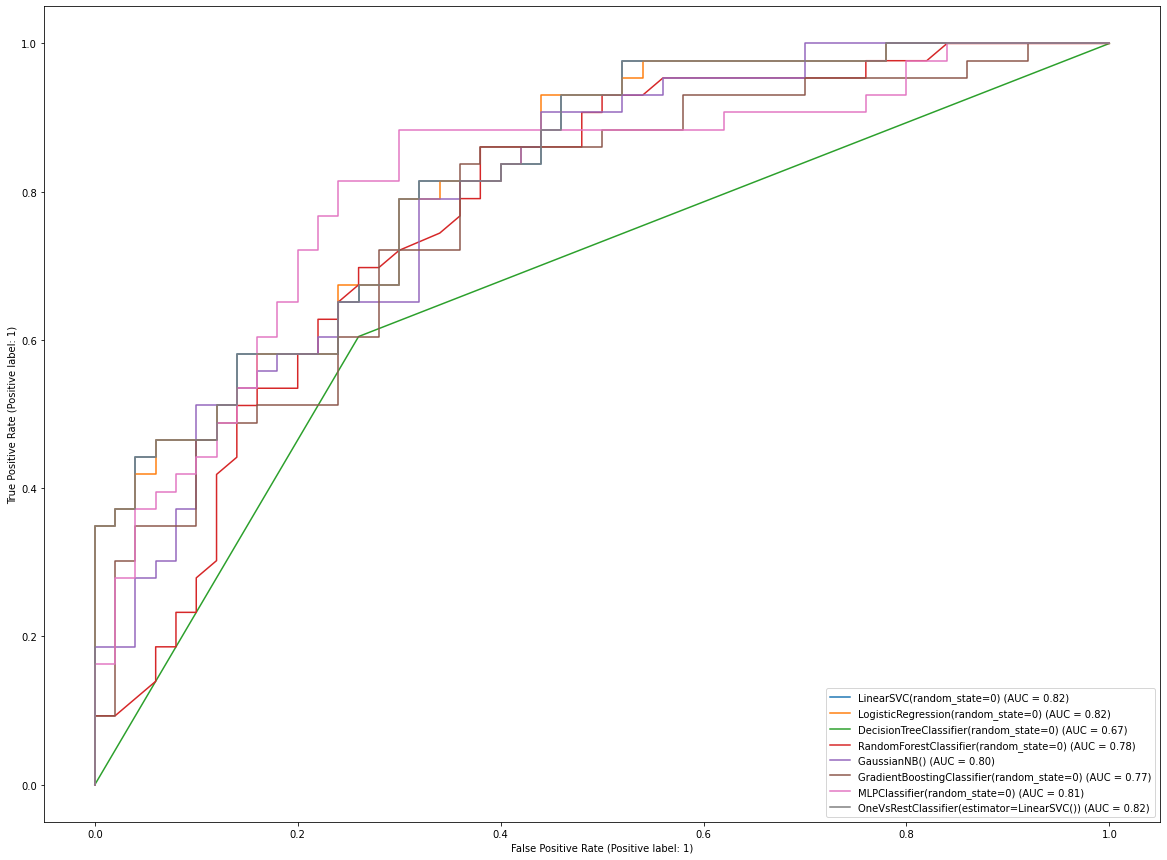

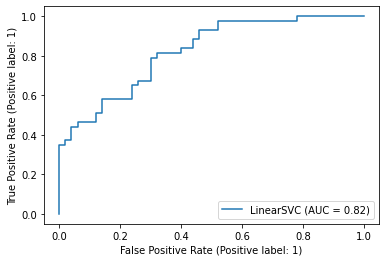

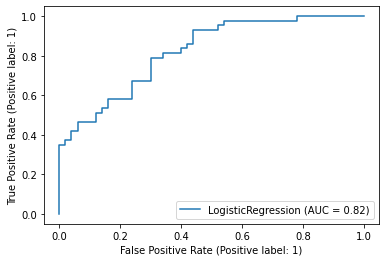

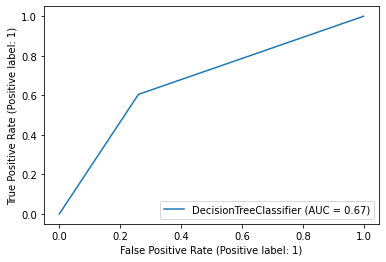

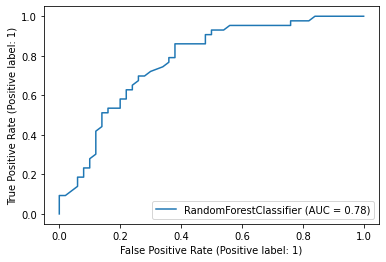

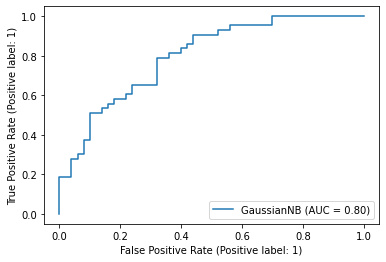

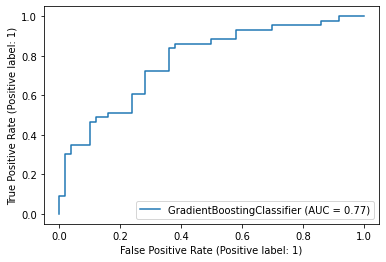

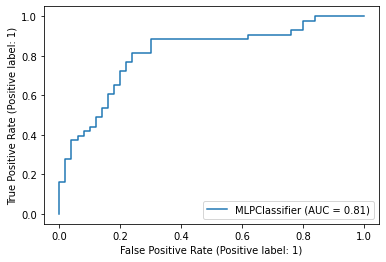

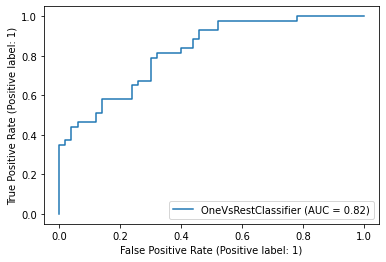

In [50]:
_, ax = plt.subplots(figsize=(20, 15))
for clf in sklearn_classifiers:
    RocCurveDisplay.from_estimator(clf, x_test, y_test).plot(ax=ax, name=clf)

In [53]:
GaussianNB()

GaussianNB()

Hyperparameter Tuning
* Set different hyperparameters for the various classifiers

In [55]:
grid = { 
    "LinearSVC": {
        "max_iter": [10, 50, 100, 500],
        "C": [1, 2, 3, 4],
        "penalty": ["l1", "l2"],
        "loss": ["hinge", "squared_hinge"],
        "fit_intercept": [True, False]},
    "LogisticRegression": {
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "penalty": ["l1", "l2", "elasticnet", "none"],
        "C": [1, 2, 3, 4],
        "max_iter": [10, 50, 100, 500]},
    "DecisionTreeClassifier": {
        "max_depth": [2, 5, 10, 20],
        "min_impurity_decrease": [0, 0.1, 0.2],
        "max_features": [1, 3, 5, 7, 10]},
#         "max_features": [50, 100, 200, 400, 500]},
    "RandomForestClassifier": {
        "max_depth": [2, 5, 10, 20],
        "n_estimators": [5, 10, 50, 100],
        "min_impurity_decrease": [0, 0.1, 0.2],
        "max_features": [1, 3, 5, 7, 10],
#         "max_features": [50, 100, 200, 400, 500],
        "bootstrap": [True, False]},
    "GaussianNB": {
        "var_smoothing": [1e-07, 1e-08, 1e-09, 1e-10]},
    "GradientBoostingClassifier": {
        "max_depth": [2, 5, 10, 20],
        "n_estimators": [5, 10, 50, 100],
        "min_impurity_decrease": [0, 0.1, 0.2],
        "max_features": [1, 3, 5, 7, 10],
#         "max_features": [50, 100, 200, 400, 500],
        "learning_rate": [0.1, 0.01],
        "loss": ["log_loss", "deviance", "exponential"]},
    "MLPClassifier": {
        "hidden_layer_sizes": [(100,), (100,100,), (100,100,50)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs", "sgd", "adam"],
        "max_iter": [10, 50, 100, 500],
        "learning_rate": ["constant", "invscaling", "adaptive"],
        "batch_size": [8, 32, 128, 512],
        "alpha": [0.001, 0.0001, 0.00001]},
    "OneVsRestClassifier": {
        "n_jobs": [1, 3, 5, 7, 10]}}

Train the model with the hyperparameters 
* Dump the models into a file
* return the best parameters

In [ ]:
for clf in sklearn_classifiers:
    rf_cv = GridSearchCV(estimator=clf, param_grid=grid[str(clf)[:str(clf).find("(")]], cv= 5)
    rf_cv.fit(x_train, y_train)
    clf = clf.set_params(**rf_cv.best_params_)
    clf.fit(x_train, y_train)
    if not os.path.exists("./models/sklearn/"):
        os.makedirs("./models/sklearn/")
    pickle.dump(clf, open("./models/sklearn/"+str(clf)[:str(clf).find("(")]+".sav", 'wb'))

    print(clf, rf_cv.best_params_)

LinearSVC(C=3, fit_intercept=False, max_iter=100, random_state=0) {'C': 3, 'fit_intercept': False, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2'}
LogisticRegression(C=2, max_iter=10, random_state=0, solver='sag') {'C': 2, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}
DecisionTreeClassifier(max_depth=2, max_features=3, min_impurity_decrease=0,
                       random_state=0) {'max_depth': 2, 'max_features': 3, 'min_impurity_decrease': 0}
RandomForestClassifier(bootstrap=False, max_depth=5, max_features=3,
                       min_impurity_decrease=0, n_estimators=10,
                       random_state=0) {'bootstrap': False, 'max_depth': 5, 'max_features': 3, 'min_impurity_decrease': 0, 'n_estimators': 10}
GaussianNB(var_smoothing=1e-07) {'var_smoothing': 1e-07}
GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=20,
                           max_features=1, min_impurity_decrease=0.2,
                           random_state=0) {'learni

In [ ]:
GradientBoostingClassifier()